# Essential Libraries

In [ ]:
#!pip install geopandas
#!pip install mapclassify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lets look at the data...

In [ ]:
df = pd.read_csv('Literacy Data 2011.csv')
df = df.iloc[:, 1:]
df['State'] = df['State'].apply(lambda x: x.lstrip())
df['District'] = df['District'].apply(lambda x: x.lstrip())
df.head()

,District,State,Literacy
0,Thane,Maharashtra,84.53
1,North Twenty Four Parganas,West Bengal,84.06
2,Bangalore,Karnataka,87.67
3,Pune,Maharashtra,86.15
4,Mumbai Suburban,Maharashtra,89.91


# EDA

## Distribution of Literacy

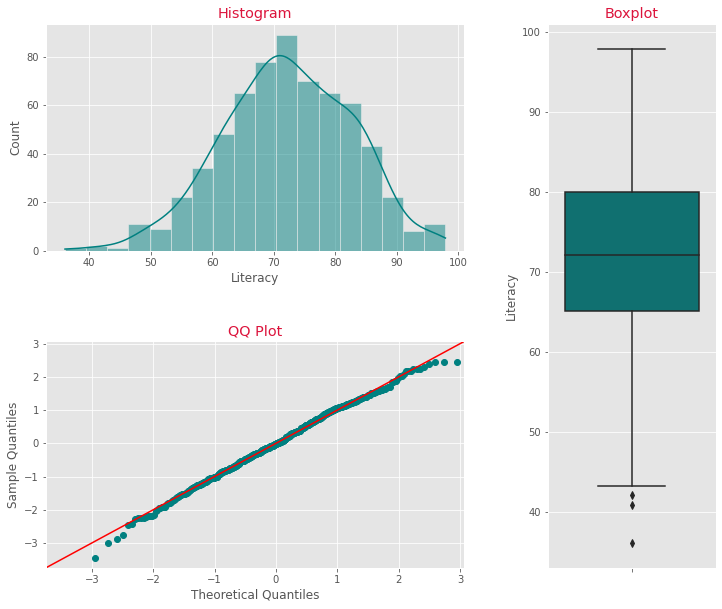

In [ ]:
def univariate_dist(data, col, color=None, theme='ggplot', figsize=(12, 10), hist_bins='auto'):
    """
    This functions plots the univariate distribution - histogram, boxplot and qqplot, 
    for a pandas dataframe 
    """
    with plt.style.context(theme):
        fig = plt.figure(figsize=figsize)
        plt.subplots_adjust(wspace=0.5, hspace=0.4)
        spec = gridspec.GridSpec(2, 3, figure=fig)
        # grid axis
        ax1 = fig.add_subplot(spec[0, :-1]) # first axis
        ax1.set_title('Histogram', color='crimson')
        ax2 = fig.add_subplot(spec[1, :-1]) # second axis
        ax2.set_title('QQ Plot', color='crimson')
        ax3 = fig.add_subplot(spec[:, -1:]) # third axis
        ax3.set_title('Boxplot', color='crimson')
        # plots
        sns.histplot(data=data, x=col, ax=ax1, color=color, kde=True, bins=hist_bins)
        qqplot(data[col], fit=True, line='45', ax=ax2, color=color)
        sns.boxplot(y=data[col], ax=ax3, color=color)
        #plt.suptitle(col.upper())
        return fig.show()
    
univariate_dist(df, 'Literacy', color='teal')

## Average Literacy Rate of Indian States

In [ ]:
avg_state_literacy = df.groupby('State').agg({'Literacy': 'mean'}).reset_index().sort_values('Literacy')

- The figure below illustrates, the average literacy of each state, which is computed by taking the average of literacy rate for all the districts within a state.

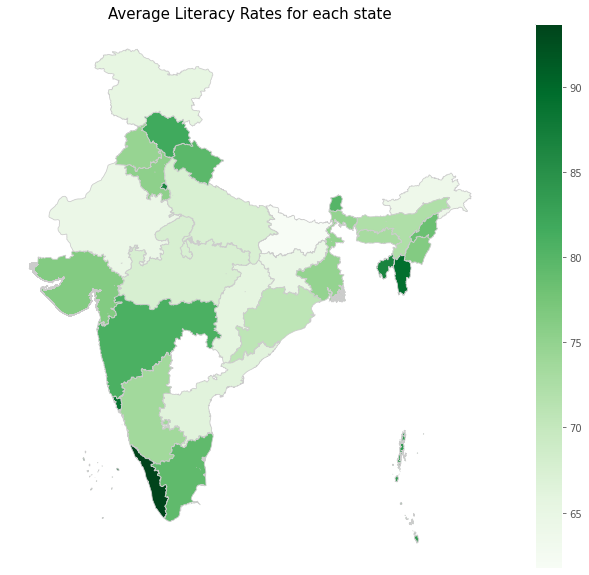

In [ ]:
# india map shape file
map_df = gpd.read_file('Indian_States.shp')
# corrections
map_df['st_nm'] = map_df['st_nm'].apply(lambda x: re.sub('&', 'and', x))
map
map_df.iloc[0, 0] = 'Andaman And Nicobar Islands'
map_df.iloc[1, 0] = 'Arunachal Pradesh'
map_df.iloc[6, 0] = 'Dadra and Nagar Haveli'
map_df.iloc[34, 0] = 'Orissa'
map_df.iloc[23, 0] = 'Delhi'
new_row = {'State': 'Telangana', 'Literacy': np.NAN}
avg_state_literacy = avg_state_literacy.append(new_row, ignore_index=True)
# merge the data frames 
merged = (map_df.set_index('st_nm').sort_index()).join(avg_state_literacy.set_index('State').sort_index())
# plot
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, figsize=(15, 10))
    ax.axis('off')
    ax.set_title('Average Literacy Rates for each state', fontdict={'fontsize': '15', 'fontweight' : '3'})
    merged.plot(column='Literacy', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.show()

In [ ]:
px.scatter(avg_state_literacy, 
           x='Literacy', 
           y='State', 
           template='ggplot2', title='Average Literacy Rate', height=800)

- The figure below illustrates the literacy rate of Indian districts. The literacy rate is divided into 5 equal intervals/categories, as shown in the legend.

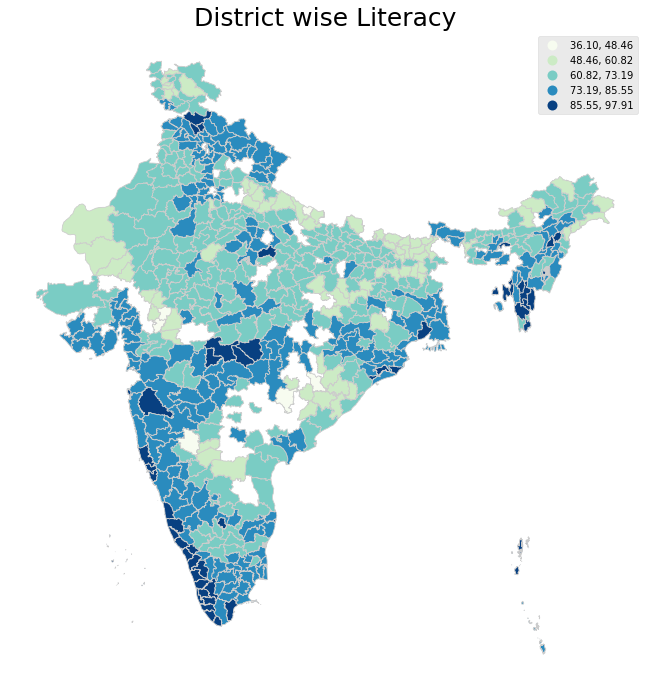

In [ ]:
# district shape file
district_map = gpd.read_file('output.shp')
district_map = district_map[['geometry', 'distname']]
# join df with map file
merged2 = (district_map.set_index('distname').sort_index()).join(df.set_index('District').sort_index())
merged2 = merged2[['geometry', 'Literacy']].dropna()
# plot
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('District wise Literacy', fontdict={'fontsize': '25', 'fontweight' : '3'})
    merged2.plot(column='Literacy', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend=True, scheme='EqualInterval', k=5)
    plt.show()

## Top 10 districts with the highest literacy rate

In [ ]:
df.sort_values(by='Literacy').set_index('District')[-10:].style.background_gradient(cmap='YlGnBu')

,State,Literacy
District,,
Thrissur,Kerala,95.080000
Kannur,Kerala,95.100000
Alappuzha,Kerala,95.720000
Ernakulam,Kerala,95.890000
Champhai,Mizoram,95.910000
Pathanamthitta,Kerala,96.550000
Kottayam,Kerala,97.210000
Mahe,Puducherry,97.870000
Aizawl,Mizoram,97.890000


## Top 10 districts with lowest literacy rate.

In [ ]:
df.sort_values(by='Literacy').set_index('District')[:10].style.background_gradient(cmap='RdYlBu')

,State,Literacy
District,,
Alirajpur,Madhya Pradesh,36.100000
Bijapur,Chhattisgarh,40.860000
Dantewada,Chhattisgarh,42.120000
Jhabua,Madhya Pradesh,43.300000
Nabarangapur,Orissa,46.430000
Shrawasti,Uttar Pradesh,46.740000
Malkangiri,Orissa,48.540000
Narayanpur,Chhattisgarh,48.620000
Kurung Kumey,Arunachal Pradesh,48.750000
